## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  43.419131  1112.234085  0.408925  5.481225  456.797486
1  57.659542   975.113625  0.508852  7.402267  499.497946
2  33.428565  1105.538537  0.164957  9.884424  185.457663
3  71.393338   726.848672  0.928043  4.691150  678.251086
4  44.763064   399.964619  0.349812  5.090609  146.860567


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0234349	total: 57.9ms	remaining: 57.9s
1:	learn: 1.0108640	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9976039	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9842038	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9704974	total: 60.5ms	remaining: 12s
5:	learn: 0.9578901	total: 61.4ms	remaining: 10.2s
6:	learn: 0.9443147	total: 62.3ms	remaining: 8.83s
7:	learn: 0.9315569	total: 62.8ms	remaining: 7.79s
8:	learn: 0.9202723	total: 63.5ms	remaining: 6.99s
9:	learn: 0.9091801	total: 64.2ms	remaining: 6.35s
10:	learn: 0.8979676	total: 64.7ms	remaining: 5.82s
11:	learn: 0.8845858	total: 65.4ms	remaining: 5.38s
12:	learn: 0.8723643	total: 65.9ms	remaining: 5s
13:	learn: 0.8600188	total: 66.3ms	remaining: 4.67s
14:	learn: 0.8485596	total: 66.9ms	remaining: 4.39s
15:	learn: 0.8391137	total: 67.4ms	remaining: 4.14s
16:	learn: 0.8270016	total: 67.9ms	remaining: 3.93s
17:	learn: 0.8156717	total: 68.3ms	remaining: 3.72s
18:	learn: 0.8071446	total: 69ms	remaining: 3.56s

31:	learn: 0.6851651	total: 75.4ms	remaining: 2.28s
32:	learn: 0.6774553	total: 76ms	remaining: 2.23s
33:	learn: 0.6699042	total: 76.4ms	remaining: 2.17s
34:	learn: 0.6618285	total: 77ms	remaining: 2.12s
35:	learn: 0.6532025	total: 77.5ms	remaining: 2.08s
36:	learn: 0.6440756	total: 77.9ms	remaining: 2.03s
37:	learn: 0.6357820	total: 78.4ms	remaining: 1.99s
38:	learn: 0.6289068	total: 78.9ms	remaining: 1.94s
39:	learn: 0.6211293	total: 79.4ms	remaining: 1.9s
40:	learn: 0.6136907	total: 79.8ms	remaining: 1.87s
41:	learn: 0.6060772	total: 80.3ms	remaining: 1.83s
42:	learn: 0.5985086	total: 80.9ms	remaining: 1.8s
43:	learn: 0.5923122	total: 81.2ms	remaining: 1.76s
44:	learn: 0.5872374	total: 81.8ms	remaining: 1.74s
45:	learn: 0.5808320	total: 82.2ms	remaining: 1.7s
46:	learn: 0.5740564	total: 82.7ms	remaining: 1.68s
47:	learn: 0.5678242	total: 83.1ms	remaining: 1.65s
48:	learn: 0.5622963	total: 83.5ms	remaining: 1.62s
49:	learn: 0.5560213	total: 83.9ms	remaining: 1.59s
50:	learn: 0.550531

195:	learn: 0.1302872	total: 151ms	remaining: 620ms
196:	learn: 0.1291728	total: 152ms	remaining: 619ms
197:	learn: 0.1281435	total: 152ms	remaining: 617ms
198:	learn: 0.1274918	total: 153ms	remaining: 615ms
199:	learn: 0.1262304	total: 153ms	remaining: 613ms
200:	learn: 0.1250008	total: 154ms	remaining: 611ms
201:	learn: 0.1239282	total: 154ms	remaining: 610ms
202:	learn: 0.1229315	total: 155ms	remaining: 609ms
203:	learn: 0.1222337	total: 155ms	remaining: 606ms
204:	learn: 0.1210235	total: 156ms	remaining: 605ms
205:	learn: 0.1202552	total: 157ms	remaining: 603ms
206:	learn: 0.1196869	total: 157ms	remaining: 602ms
207:	learn: 0.1187118	total: 158ms	remaining: 601ms
208:	learn: 0.1178591	total: 158ms	remaining: 599ms
209:	learn: 0.1166834	total: 159ms	remaining: 597ms
210:	learn: 0.1158564	total: 159ms	remaining: 595ms
211:	learn: 0.1153489	total: 159ms	remaining: 593ms
212:	learn: 0.1142198	total: 160ms	remaining: 591ms
213:	learn: 0.1133936	total: 160ms	remaining: 589ms
214:	learn: 

346:	learn: 0.0613117	total: 222ms	remaining: 418ms
347:	learn: 0.0607724	total: 223ms	remaining: 417ms
348:	learn: 0.0606513	total: 223ms	remaining: 416ms
349:	learn: 0.0602072	total: 223ms	remaining: 415ms
350:	learn: 0.0598841	total: 224ms	remaining: 414ms
351:	learn: 0.0595660	total: 224ms	remaining: 413ms
352:	learn: 0.0594588	total: 225ms	remaining: 412ms
353:	learn: 0.0589752	total: 225ms	remaining: 411ms
354:	learn: 0.0588622	total: 226ms	remaining: 410ms
355:	learn: 0.0585536	total: 226ms	remaining: 409ms
356:	learn: 0.0584506	total: 227ms	remaining: 408ms
357:	learn: 0.0579451	total: 227ms	remaining: 408ms
358:	learn: 0.0575860	total: 228ms	remaining: 407ms
359:	learn: 0.0574863	total: 228ms	remaining: 406ms
360:	learn: 0.0570807	total: 229ms	remaining: 405ms
361:	learn: 0.0567326	total: 229ms	remaining: 404ms
362:	learn: 0.0563905	total: 230ms	remaining: 403ms
363:	learn: 0.0562949	total: 230ms	remaining: 402ms
364:	learn: 0.0559596	total: 230ms	remaining: 401ms
365:	learn: 

543:	learn: 0.0264927	total: 314ms	remaining: 263ms
544:	learn: 0.0263397	total: 315ms	remaining: 263ms
545:	learn: 0.0263073	total: 315ms	remaining: 262ms
546:	learn: 0.0261592	total: 316ms	remaining: 262ms
547:	learn: 0.0261274	total: 316ms	remaining: 261ms
548:	learn: 0.0259784	total: 317ms	remaining: 260ms
549:	learn: 0.0258342	total: 317ms	remaining: 260ms
550:	learn: 0.0258101	total: 318ms	remaining: 259ms
551:	learn: 0.0257792	total: 318ms	remaining: 258ms
552:	learn: 0.0256545	total: 319ms	remaining: 258ms
553:	learn: 0.0255042	total: 319ms	remaining: 257ms
554:	learn: 0.0254741	total: 319ms	remaining: 256ms
555:	learn: 0.0253403	total: 320ms	remaining: 256ms
556:	learn: 0.0252182	total: 320ms	remaining: 255ms
557:	learn: 0.0251891	total: 321ms	remaining: 254ms
558:	learn: 0.0251358	total: 321ms	remaining: 253ms
559:	learn: 0.0250234	total: 322ms	remaining: 253ms
560:	learn: 0.0248866	total: 322ms	remaining: 252ms
561:	learn: 0.0248250	total: 323ms	remaining: 251ms
562:	learn: 

653:	learn: 0.0166427	total: 370ms	remaining: 195ms
654:	learn: 0.0165710	total: 370ms	remaining: 195ms
655:	learn: 0.0165064	total: 371ms	remaining: 195ms
656:	learn: 0.0164204	total: 372ms	remaining: 194ms
657:	learn: 0.0163821	total: 373ms	remaining: 194ms
658:	learn: 0.0163189	total: 373ms	remaining: 193ms
659:	learn: 0.0162666	total: 374ms	remaining: 193ms
660:	learn: 0.0161577	total: 374ms	remaining: 192ms
661:	learn: 0.0160512	total: 375ms	remaining: 191ms
662:	learn: 0.0159904	total: 375ms	remaining: 191ms
663:	learn: 0.0159238	total: 376ms	remaining: 190ms
664:	learn: 0.0158213	total: 376ms	remaining: 190ms
665:	learn: 0.0157534	total: 377ms	remaining: 189ms
666:	learn: 0.0156869	total: 377ms	remaining: 188ms
667:	learn: 0.0156211	total: 378ms	remaining: 188ms
668:	learn: 0.0155875	total: 378ms	remaining: 187ms
669:	learn: 0.0155228	total: 379ms	remaining: 186ms
670:	learn: 0.0154763	total: 379ms	remaining: 186ms
671:	learn: 0.0154014	total: 380ms	remaining: 185ms
672:	learn: 

843:	learn: 0.0087980	total: 461ms	remaining: 85.1ms
844:	learn: 0.0087768	total: 461ms	remaining: 84.6ms
845:	learn: 0.0087425	total: 462ms	remaining: 84.1ms
846:	learn: 0.0087126	total: 462ms	remaining: 83.5ms
847:	learn: 0.0086793	total: 463ms	remaining: 83ms
848:	learn: 0.0086445	total: 464ms	remaining: 82.5ms
849:	learn: 0.0086088	total: 464ms	remaining: 81.9ms
850:	learn: 0.0085771	total: 464ms	remaining: 81.3ms
851:	learn: 0.0085485	total: 465ms	remaining: 80.8ms
852:	learn: 0.0085165	total: 465ms	remaining: 80.2ms
853:	learn: 0.0084817	total: 466ms	remaining: 79.6ms
854:	learn: 0.0084600	total: 466ms	remaining: 79.1ms
855:	learn: 0.0084260	total: 467ms	remaining: 78.5ms
856:	learn: 0.0084048	total: 467ms	remaining: 77.9ms
857:	learn: 0.0083929	total: 467ms	remaining: 77.4ms
858:	learn: 0.0083597	total: 468ms	remaining: 76.8ms
859:	learn: 0.0083322	total: 468ms	remaining: 76.2ms
860:	learn: 0.0083015	total: 469ms	remaining: 75.7ms
861:	learn: 0.0082780	total: 469ms	remaining: 75

989:	learn: 0.0054946	total: 532ms	remaining: 5.37ms
990:	learn: 0.0054859	total: 532ms	remaining: 4.83ms
991:	learn: 0.0054558	total: 533ms	remaining: 4.3ms
992:	learn: 0.0054315	total: 534ms	remaining: 3.76ms
993:	learn: 0.0054107	total: 534ms	remaining: 3.22ms
994:	learn: 0.0053870	total: 535ms	remaining: 2.69ms
995:	learn: 0.0053581	total: 535ms	remaining: 2.15ms
996:	learn: 0.0053316	total: 536ms	remaining: 1.61ms
997:	learn: 0.0053086	total: 536ms	remaining: 1.07ms
998:	learn: 0.0052827	total: 537ms	remaining: 537us
999:	learn: 0.0052603	total: 537ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

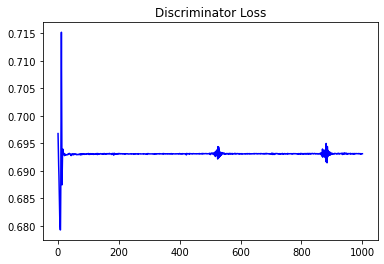

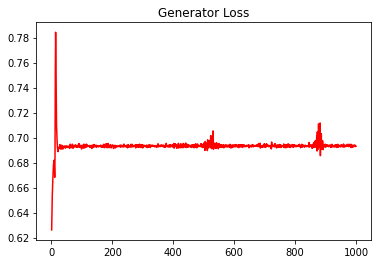

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.006156416362150089


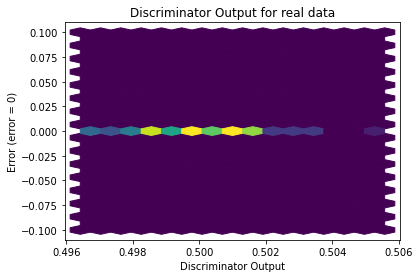

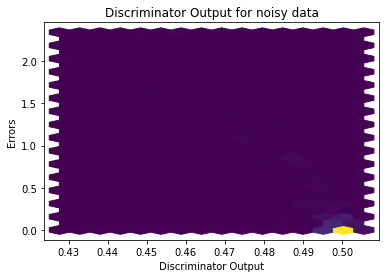

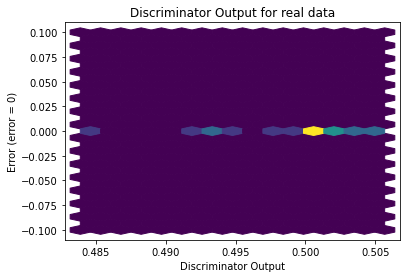

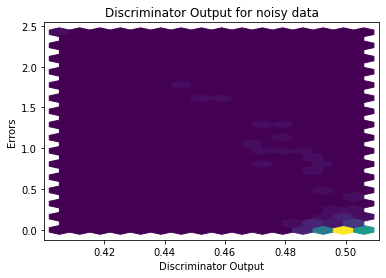

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


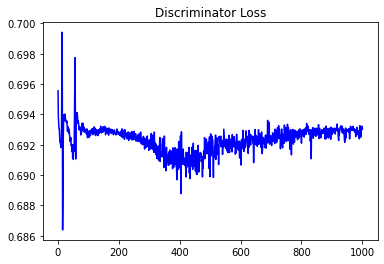

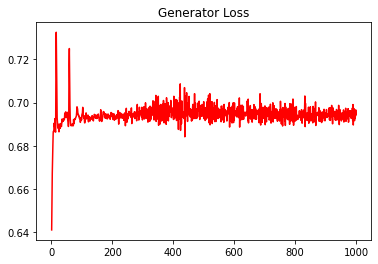

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.007916569686080777


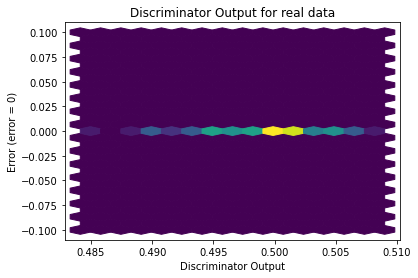

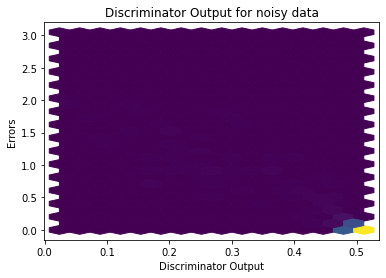

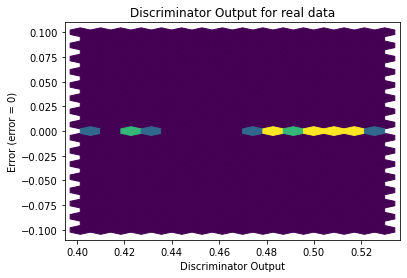

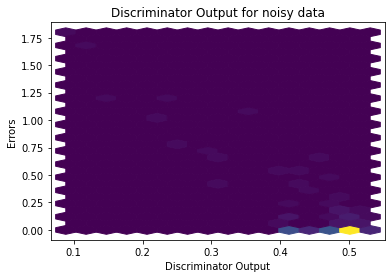

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0528]], requires_grad=True)
